Notebook to accompany lecture on Decision Theory </br>
By Jimmy Mulder, Hogeschool Utrecht

Imports

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

data = (np.random.randn(100) * 2 + 30)

Binomial example: adapt this code so that it matches the figure in slide 7

(array([   7.,   94.,  425., 1148., 2065., 2455., 2043., 1200.,  440.,
         122.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

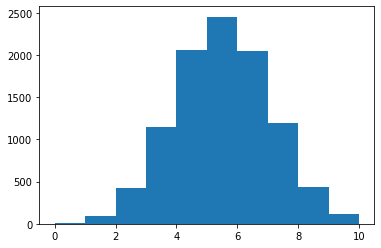

In [7]:
all_outcomes = []
for i in range(1,10000):
  coinflip_outcomes = random.choices(["heads","tails"], weights=[50,50], k=10)
  num_heads = coinflip_outcomes.count("heads")
  all_outcomes.append(num_heads)

plt.hist(all_outcomes)


Discrete example: Add to this code to recreate the figure in slide 10

(array([ 263.,  572.,  878., 1137., 1384., 1684., 1364., 1097.,  851.,
         512.,  257.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <a list of 11 Patch objects>)

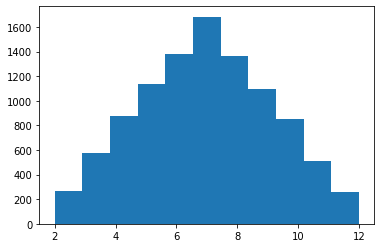

In [10]:
all_outcomes = []
for i in range(1,10000):
  die_roll1 = random.randint(1,6)
  die_roll2 = random.randint(1,6)
  sum2222 = die_roll1 + die_roll2
  all_outcomes.append(sum)

plt.hist(all_outcomes, bins=11)

Lottery example: try to recreate the plots on slide 11. 
Increase the ticket cost and add code to calculate your odds of making a profit

(array([  6.,  11.,  66., 136., 343., 375., 617., 495., 500., 686., 525.,
        770., 562., 728., 532., 571., 391., 356., 493., 294., 322., 227.,
        230., 127., 115., 118.,  86.,  77.,  49.,  54.,  36.,  33.,  21.,
         13.,  11.,   7.,   3.,   5.,   2.,   1.,   2.,   0.,   1.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 20. ,  37.2,  54.4,  71.6,  88.8, 106. , 123.2, 140.4, 157.6,
        174.8, 192. , 209.2, 226.4, 243.6, 260.8, 278. , 295.2, 312.4,
        329.6, 346.8, 364. , 381.2, 398.4, 415.6, 432.8, 450. , 467.2,
        484.4, 501.6, 518.8, 536. , 553.2, 570.4, 587.6, 604.8, 622. ,
        639.2, 656.4, 673.6, 690.8, 708. , 725.2, 742.4, 759.6, 776.8,
        794. , 811.2, 828.4, 845.6, 862.8, 880. ]),
 <a list of 50 Patch objects>)

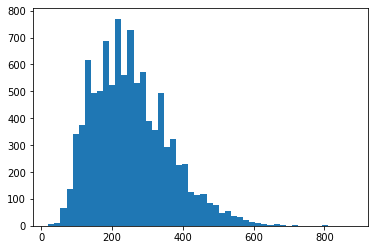

In [5]:
number_of_players = 10000
number_of_tickets = 100
ticket_cost = 0
all_outcomes = []
for i in range(0, number_of_players):
  lottery_outcomes = random.choices([0, 5, 20, 100], weights=[84,10,5,1], k=number_of_tickets)
  all_outcomes.append(sum(lottery_outcomes))
plt.hist(all_outcomes, bins=50)


Continuous example: try varying the bin size (i.e. decrease the interval) and see what happens

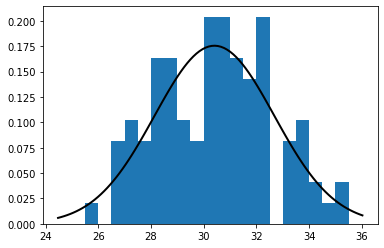

In [6]:
from scipy.stats import norm
bin_size = 0.5
plt.hist(data, density = True, bins=np.arange(25,36,bin_size))

mu, std = norm.fit(data) 

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

Let's dig a little deeper into the marshmallow experiment. First, decide for yourself what the utility function for marshmallows is. For me, it looks something like this:

Text(0, 0.5, 'funpoints')

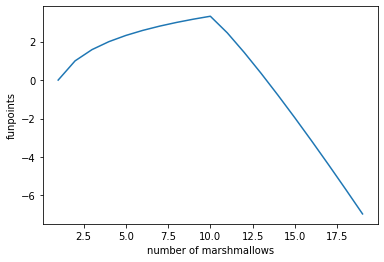

In [8]:
def MM_utility(number_of_marshmallows):
  if (number_of_marshmallows < 10):
    return math.log(number_of_marshmallows,2)
  else:
    return math.log(number_of_marshmallows,2) - math.pow(number_of_marshmallows - 10, 1.1)

MMlist = []
for i in range (1,20):
  MMlist.append(MM_utility(i))

plt.plot(range(1,20),MMlist)
plt.xlabel("number of marshmallows")
plt.ylabel("funpoints")

As you can see in this plot, I enjoy 2 marsmallows more than 1, but after 10 marshmallows I start to get nauseous, and after about 13 I regret eating any at all. <br>
Try to come up with your own utility function!

In [ ]:
def MM_utility(number_of_marshmallows):
  return 0 #add your code here

MMlist = []
for i in range (1,20):
  MMlist.append(MM_utility(i))

plt.plot(range(1,20),MMlist)
plt.xlabel("number of marshmallows")
plt.ylabel("funpoints")

Now lets think about the experiment: In which case is it rational for you to wait, and when is it more rational to simply eat the marshmallow right away? Let's vary the number of marshmallows, the amount of trust you have in the psychologists, and how long you have to wait/how much you hate waiting! Then go back and change your utility function and try again.

In [29]:
Utility_one_MM = MM_utility(1)

amount_of_extra_marshmallows = 10 # try varying this variable.
Utility_of_extra_marshmallows = MM_utility(amount_of_extra_marshmallows + 1)
trust_level = 0.75 # odds that the experimenter keeps their promise. try varying this variable.

waiting_penalty = 1.2 # an arbitrary amount of funpoints. try varying this variable.

expected_utility_of_waiting = Utility_of_extra_marshmallows * trust_level - waiting_penalty

if (Utility_one_MM > expected_utility_of_waiting):
  print("eat the marshmallow!")
else:
  print("have some patience!")

have some patience!


Advanced topics: exploration vs exploitation. In this excercise, we'll play the slot machines and try to find the optimal strategy. Follow the instructions in the comments to recreate the experiment we discussed during the lecture. Then vary the payout schemes and the exploration phase. How are these two concepts related to each other?

In [30]:
def play_slot_machine(machine_number):
  slot_machine_1_payout = 100
  slot_machine_1_payout_chance = 0.1 # slot machine 1 gives a 10% chance of winning 100 dollars. Now add 2 more machines!
  slot_machine_2_payout = 50
  slot_machine_2_payout_chance = 0.15 # slot machine 1 gives a 10% chance of winning 100 dollars. Now add 2 more machines!
  slot_machine_3_payout = 5
  slot_machine_3_payout_chance = 0.8 # slot machine 1 gives a 10% chance of winning 100 dollars. Now add 2 more machines!

  if (machine_number == 1):
    return random.choices([slot_machine_1_payout,0], weights=[slot_machine_1_payout_chance,1 - slot_machine_1_payout_chance], k=1)[0] # add the other 2 machines
  elif (machine_number ==2):
    return random.choices([slot_machine_2_payout,0], weights=[slot_machine_2_payout_chance,1 - slot_machine_2_payout_chance], k=1)[0] # add the other 2 machines
  elif (machine_number ==3):
    return random.choices([slot_machine_3_payout,0], weights=[slot_machine_3_payout_chance,1 - slot_machine_3_payout_chance], k=1)[0] # add the other 2 machines
  else: return "no machine with that number"

total_rounds = 1000
exploration_rounds_per_machine = 100

m1_profits = []
m2_profits = []
m3_profits = []

for i in range(1, exploration_rounds_per_machine):
  # adapt or add to this code to use and store the output of all 3 machines, so you can calculate the average profit of each machine!
  m1_profits.append(play_slot_machine(1)) 
  m2_profits.append(play_slot_machine(2)) 
  m3_profits.append(play_slot_machine(3)) 

avg_profit1 = np.mean(m1_profits)
avg_profit2 = np.mean(m2_profits)
avg_profit3 = np.mean(m3_profits)

exploration_phase_profit = sum(m1_profits) + sum(m2_profits) + sum(m3_profits)

best_machine_number = np.argmax(np.array([avg_profit1, avg_profit2, avg_profit3])) + 1 #compensate for index number

print("average profit for machine 1: " + str(avg_profit1))
print("average profit for machine 2: " + str(avg_profit2))
print("average profit for machine 3: " + str(avg_profit3))
print("total profit in exploration phase: " + str(exploration_phase_profit)) 
print("choosing machine: " + str(best_machine_number))

exploitation_phase_profit = 0 # leave this at 0
for i in range(1, total_rounds - exploration_rounds_per_machine * 3): # for the remaining rounds, exploit the best machine
  exploitation_phase_profit += play_slot_machine(best_machine_number)

print("epxloitation phase profit: " + str(exploitation_phase_profit))
print("total profit is: " + str(exploration_phase_profit + exploitation_phase_profit))

average profit for machine 1: 8.080808080808081
average profit for machine 2: 13.131313131313131
average profit for machine 3: 4.292929292929293
total profit in exploration phase: 2525
choosing machine: 2
epxloitation phase profit: 5600
total profit is: 8125
